In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:\\LEARNBAY\\Projects\\April\\Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


1. No missig Data
2. No outliers
3. Only Gender is object...so we can encode that. 
4. Feature scaling 

NO need to check Imbalance dataset as there are no target values. It is unsupervised datasets. 

In [44]:
x = df.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [39]:
# from sklearn.preprocessing import StandardScaler

# sc =StandardScaler()
# xc = sc.fit_transform(x)
# xc

# Model Building

In [45]:
from sklearn.cluster import KMeans

In [46]:
wcss = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i,random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [47]:
wcss

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30566.45113025186,
 25005.55037243283,
 21996.523372372307,
 19746.911957660894,
 17602.19046838677,
 15926.627039985106,
 14631.802353268315,
 12793.951692914929]

In [48]:
abc = [1,2,3,4,5,6,7,8,9,10,11,12,13]

<AxesSubplot:>

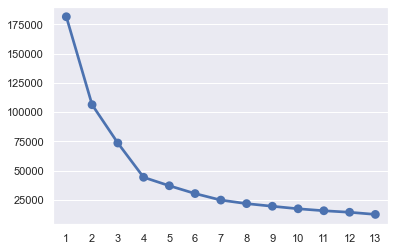

In [49]:
sns.pointplot(abc,wcss)

In [50]:
kmeans = KMeans(n_clusters=4,random_state=1)
kmeans.fit(xc)

KMeans(n_clusters=4, random_state=1)

In [51]:
y_pred = kmeans.fit_predict(xc)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [52]:
actual_data = pd.concat([df,pd.DataFrame(y_pred)])
actual_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1.0,Male,19.0,15.0,39.0,NaN
1,2.0,Male,21.0,15.0,81.0,NaN
2,3.0,Female,20.0,16.0,6.0,NaN
3,4.0,Female,23.0,16.0,77.0,NaN
4,5.0,Female,31.0,17.0,40.0,NaN
...,...,...,...,...,...,...
195,NaN,NaN,NaN,NaN,NaN,3.0
196,NaN,NaN,NaN,NaN,NaN,2.0
197,NaN,NaN,NaN,NaN,NaN,3.0
198,NaN,NaN,NaN,NaN,NaN,2.0


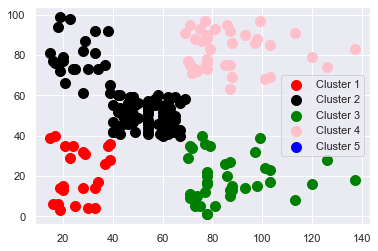

In [61]:
plt.scatter(x[y_pred==0,0], x[y_pred == 0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_pred==1,0], x[y_pred == 1,1],s=100,c='black',label='Cluster 2')
plt.scatter(x[y_pred==2,0], x[y_pred == 2,1],s=100,c='green',label='Cluster 3')
plt.scatter(x[y_pred==3,0], x[y_pred == 3,1],s=100,c='pink',label='Cluster 4')
plt.scatter(x[y_pred==4,0], x[y_pred == 4,1],s=100,c='blue',label='Cluster 5')
plt.legend()

Cluster 1 : has less salaey and has less spending score. 
Cluster 2 : has less to ok salary and more to medium spending score. We can also increase there credit limit or provide them with
offers to start more speding. 
Cluster 3 : High salary but low spending score...we need to encourage them to shop
Cluster 4 : High salary and high spending score. We can give them some loyality cards or bonus points for shopiing. 
Cluster 5 : No cluster 5 is there.

In [71]:
final_report = actual_data.to_csv("Mall Cluster.csv")

# Done